In [9]:
import pandas as pd
import numpy as np
from analyze_src.basic_data_inspection import DataInspector, DataTypeInspectionStrategy, SummarryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import NumericalUnivariateAnalysis,  UnivariateAnalyzer, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
# Cấu hình cho việc hiển thị cho tốt hơn
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 100)


In [10]:
# Load dữ liệu
url = '../unzip_dataset/AmesHousing.csv'
df = pd.read_csv(url)

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [11]:
# Kiểm tra dữ liệu cơ bản
# Xem cấu trúc của DataFrame
data_inspector = DataInspector(DataTypeInspectionStrategy())
data_inspector.execute_inspector(df)


Cấu trúc của DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   obj

**1. Khái quát tập dữu liệu**

Bộ dữ liệu AmesHousing có 2930 quan sát (dòng) và 82 biến (cột). Các biến bao gồm cả biến số(float, int) và biến phân loại(kiểu object). Mô tả nhiều khía cạnh của nhà và lô đất như:
- **Đặc điểm mảnh đất:** diện tích, mặt tiền, hình dạng lô, địa hình, khu vực lân cận.
- **Đặc điểm ngôi nhà:** kiểu nhà, số tầng, chất lượng tổng thể, tình trạng bảo trì, năm xây dựng, năm sửa chữa.
- Đặc điểm tầng hầm, gara, vật liệu xây dựng, tiện ích,...

**2. Tình trạng dữ liệu bị thiếu**

Từ thông tin Non-null ở trong phần cấu trúc, ta có thể thấy có một số biến dữ liệu bị thiếu:
- **Lot Frontage:** Chỉ có 2440 giá trị không khuyết trên tổng thể 2930 quan sát -> còn khoảng 490 giá trị bị thiếu.
- **Alley:** chỉ có 198 giá trị không khuyết, có rất nhiều giá trị thiếu -> phần lớn nhà không có ngõ hoặc không được ghi nhận.
- **Mas Vnr Type:** có 1155 giá trị không khuyết -> nhiều giá trị bị thiếu về loại ốp tường ngoài.
- **Mas Vnr Area , Bsmt, Qual, Bsmt Exposure Type 1/2, BsmFin SF 1/2, Bsmt Unf SF** cũng có một số lượng nhỏ giá trị bị thiếu.

In [12]:
# Thống kê mô tả DataFrame
data_inspector.set_strategy(SummarryStatisticsInspectionStrategy())
data_inspector.execute_inspector(df)


Thống kê tóm tắt DataFrame cho cột số
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.

**Một số điểm nổi bật của dữ liệu `Numberic` qua thống kê trên:**

- **Overall Qual(chất lượng tổng thể nhà):** Trung bình ~6. Gía từ 1-10 với độ lệch chuẩn là 1.4 thì giá nhà có chất lượng rơi vào khoảng từ 5-7.
- **Gr Liv Area(diện tích sử dụng):** Trung bình ~1.500 sqft, median=1442. Và có thể thấy có một ngôi nhà có diện tích rất lớn max=5642 -> Outlier
- **Lot Area:** min=1300, max=215,245 -> giá trị cực lớn so với trung bình là 10.148 và cả độ lệch chuẩn cũng rất lớn -> ***CẦN LƯU Ý KHI ĐƯA VÀO MODEL***
- Nhiều cột như **BsmtFin SF 2, Low Qual Fin SF** có nhiều giá trị là 0 -> nhiều nhà không có tầng hầm hoặc tầng hầm chất lượng thấp

**Lưu ý:** Các biến mà có độ lệch chuẩn lớn và max quá lớn so với trung bình thì có thể được chuẩn hóa hoặc log-tranform khi đưa vào model.

**Một số điểm nổi bật của dữ liệu `Category/Object` qua thống kê trên:**

- **MS Zoning:** Loại RL chiếm đa số(~77%) -> dữ liệu skew (lệch)
- **Street:** Loại Pave chiếm gần hết dataset -> Hầu hết là đường rải nhựa -> ít thông tin phân biệt.
- **Alley:** TOP là Grvl nhưng tần suất chỉ có 120 -> Hầu hêt loại này bị missing -> Chuyển giá trị bị missing thành category `None`
- **Neightborhood:** Có 28 giá trị khác nhau -> Có nhiều khu vực khác nhau -> cần `one-hot-encoding` hoặc `target encoding.`
- **Garage Type:** Gía trị missing khá nhiều (chỉ có 1731 giá trị không khuyết) -> Biến này quan trọng cho giá nhà -> cần kiểm tra missing.
- **Pool Qc:** Gần như là missing chỉ có 4 giá trị không khuyết -> ít ảnh hưởng, có thể loại bỏ.

 **Chiến lược xử lý missing:**

- `Numberical` -> điền median hoặc mean.
- `Category `-> tạo cattegory `None`.
- Cột hầu hết missing`(Pool QC) `-> có thể loại bỏ khỏi model.

**Outliers**

Một số cột có giá trị cực lớn so với 75%:
- `Lot Area:` max=215.245,75% = 11555 -> outlier
- `Gr Liv Area:` max = 5,642, 75% = 1,742 → outlier.
- `SalePrice:`  max = 755,000, 75% = 213,500 → outlier.

**Chiến lược xử lý:**

- Có thể log-transform để giảm skew cho model
- Hoặc loại bỏ những giá trị bất thường.


Số giá trị bị thiếu của cột:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

 Vẽ biểu đồ HeatMap giá trị bị thiếu....


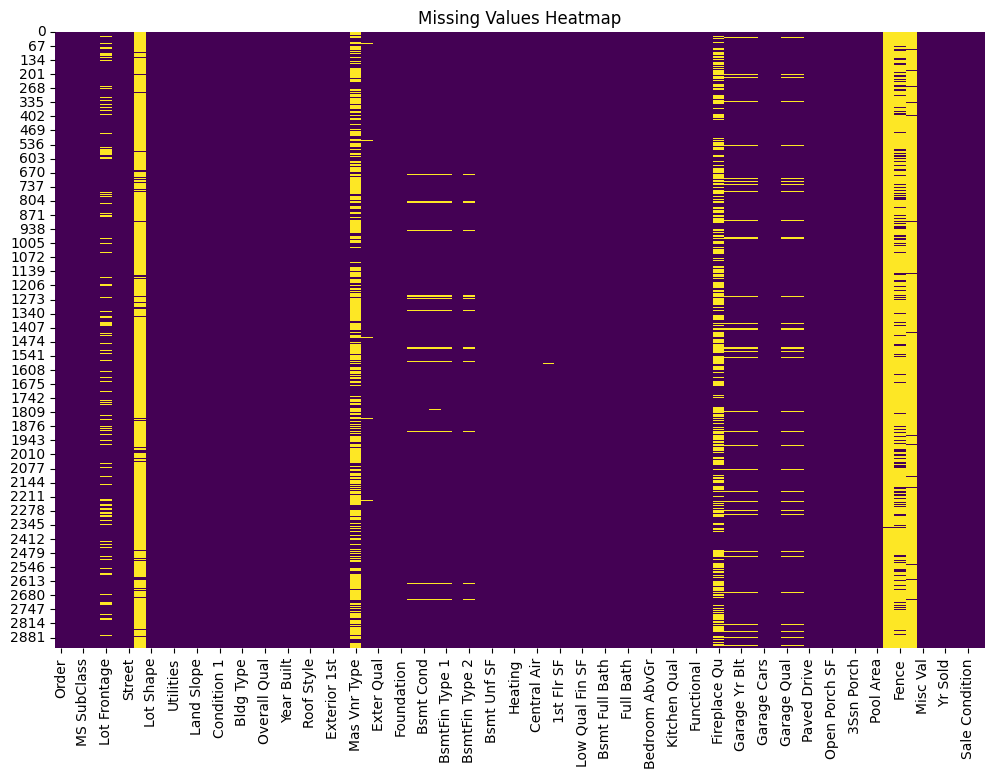

In [13]:
# Phân tích giá trị thiếu
data_missing = SimpleMissingValuesAnalysis()
data_missing.analyze(df)

**Giải thích biểu đồ nhiệt**

**1. Màu sắc thể hiện dữ liệu thiếu**

- `Màu vàng:` Thể hiện các giá trị thiếu, càng nhiều màu vàng thì cột đó càng nhiều giá trị thiếu.
-` Màu tím:` Thể hiện các giá trị không khuyết, các cột mà hầu hết là màu tím thì hầu hết các dữ liệu đều có mặt ở cột đó.

**2. Xác định các cột có giá trị bị thiếu**

Dễ dàng thấy được các cột như `Lot Frontage`, `Mas Vnr Type`, `Fireplace Qu`, `Garage Yt BLt`, `Fence`,... các thuộc tính có giá trị bị thiếu khá cao.

**3. Hiểu về sự phân bố giá trị bị thiếu**

**Phân bố ngẫu nhiên:** Tức là khi mà các dải màu vàng nó phân bố rải rác không có bất kỳ một khu vực hay vùng nào nhất định thì dữ liệu thiếu đó gọi là phân bố ngẫu nhiên.

**Phân bố có cấu trúc:** Tức là màu vàng tập triung ở một số hàng hoặc số cột nhất định, toàn bộ hàng hoặc cột bị thiếu có thể cho thấy vấn đề thu nhập dữ liệu hoặc các tính năng này không được áp dụng cho 1 số trường nhất định. (Vấn đề ở việc thu thập dữ liệu).

**4. Đánh giá mức độ nghiêm trọng**

Các cột có nhiều màu vàng thì cho thấy tỉ lệ giá trị thiếu cao, điều này dẫn đến vấn đề mô hình có thể bị sai lệch nên cần được xử lý đúng cách. 
-> Đưa ra quyết định fill các trường đó hay loại bỏ hay tính toán rồi fill lại các trường như thế nào cho từng loại.

# THÔNG TIN CHI TIẾT VỀ BỘ DATASET NÀY SAU KHI KHÁM PHÁ CƠ BẢN 

**Một số đặc điểm số liệu quan trọng**
- Biến mục tiêu `SalePrice` có giá trị trung bình là `180.796 đô la` với độ lệch chuẩn là `79.886 đô ` cho thấy sự chênh lệch khá lớn về giá nhà, tức là có những căn nhà rất nhỏ là cũng có những căn rất lớn.
- Biến `Overall Qual(chất lượng tổng thể ngôi nhà)`: dao động từ `1->10` với giá trị trung bình là `6.09` cho thấy chất lượng tương đối ổn.
- Biến `Year Built` dao động từ ` năm 1872 đến 2010`, cho thấy tập dữ liệu bao gồm các ngôi nhà rất cũ và tương đối mới.
- Biến `Lot Area`có phạm vi rất rộng và thấy được outlier rõ ràng, với giá trị lớn nhất là `215.245 feet vuoong` trong đó giá trị chỉ rơi vào chru yếu từ 7.4k-> 11.5k.

**Phân tích giá trị thiếu và đưa ra hướng giải quyết**

***1. Xử lý giá trị thiếu***

**- Gía trị bị thiếu đáng kể:** Các cột như `Alley`, `Pool QC`, `Fence`, và `Misc Feature` có tỷ lệ thiếu rất cao. Cần đưa ra quyết định nên xem:
        - Loại bỏ hoàn toàn các cột này , vì chúng có thể mang lại giá trị không đáng kể.
        - Điền các giá trị thiếu bằng một ký tự giữ chỗ (Ví dụ: None/Nan) để giữ chúng trong phân tích.

**- Gía trị thiếu ở mức độ vừa phải:** Các đặc điểm liên quan đến tầng hầm và nhà để xe cần được xử lý cẩn thận. Các giá trị thiếu có thể được điền bằng `Không có tầng hầm` hoặc `Không có nhà để xe` đối với đặc điểm phân loại, còn bằng `0` nếu là đặc điểm số.

**- Gía trị đơn lẻ:** Những giá trị này có thể điền bằng giá trị phổ biến hoặc giá trị trung bình đối với các đặc điểm phân loại và số tương ứng.

**2. Phát hiện outlier**

Các đặc điểm như `Lot Area` , `Gr Liv Area`, và `SalePrice` cho thấy phạm vi biến động cao -> ngoại lệ tiềm năng -> cần phải xử lý tránh sai lệch mô hình.

**3. Mã hóa phân loại**

Các đặc trưng phân loại như `Neighborhood`, `MS Zoning`, `Bldg Type`, `Exterior 1st` có nhiều giá trị duy nhất. Mã hóa các đặc trưng này theo hướng ***one-hot encoding, label encoding, frequence encoding*** dựa vào mối quan hệ của các đặc trung với biến mục tiêu.



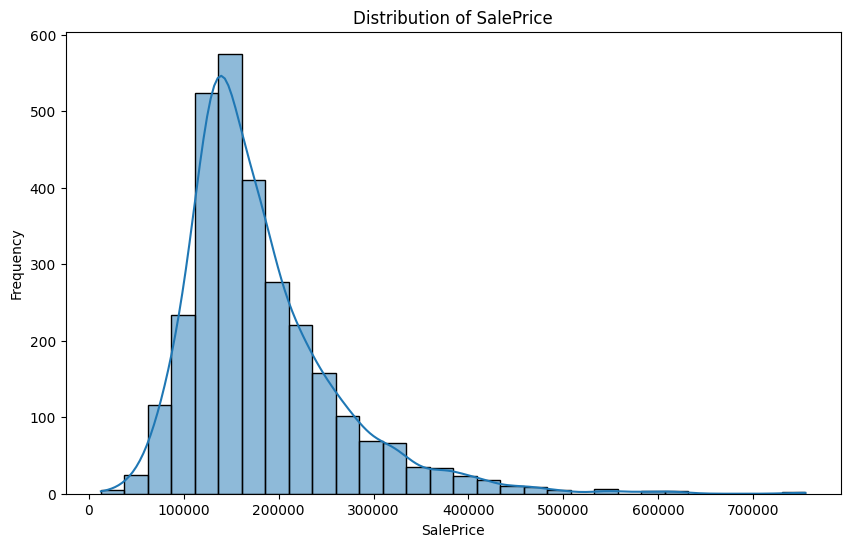

In [14]:
# Phân tích cột SalePrice
analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
analyzer.execute_analysis(df, "SalePrice")

d:\Project_Portfolio\HOUSE-PRICE-MLOPS\analysis\analyze_src\univariate_analysis.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data = df, palette="muted")


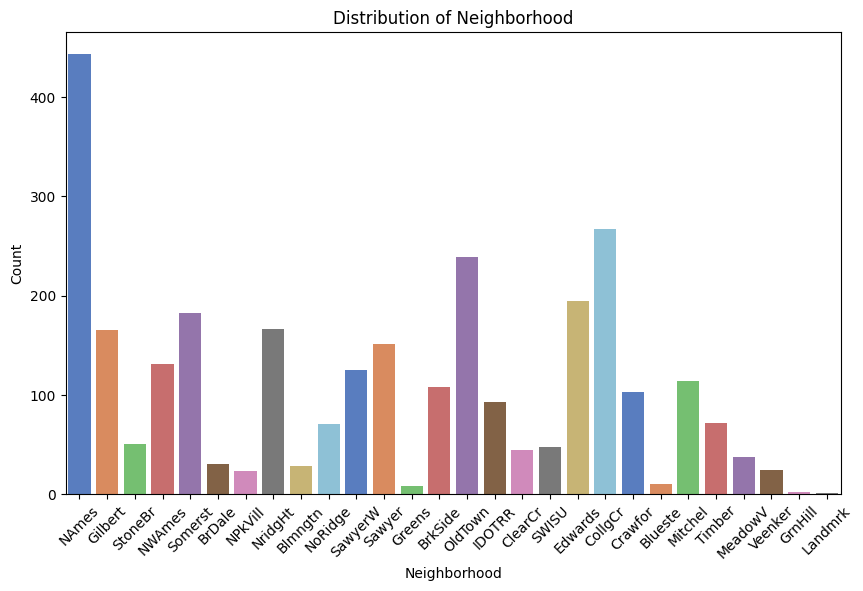

In [15]:
# Phân tích cột Neighborhood
analyzer.set_strategy(CategoricalUnivariateAnalysis())
analyzer.execute_analysis(df, 'Neighborhood')

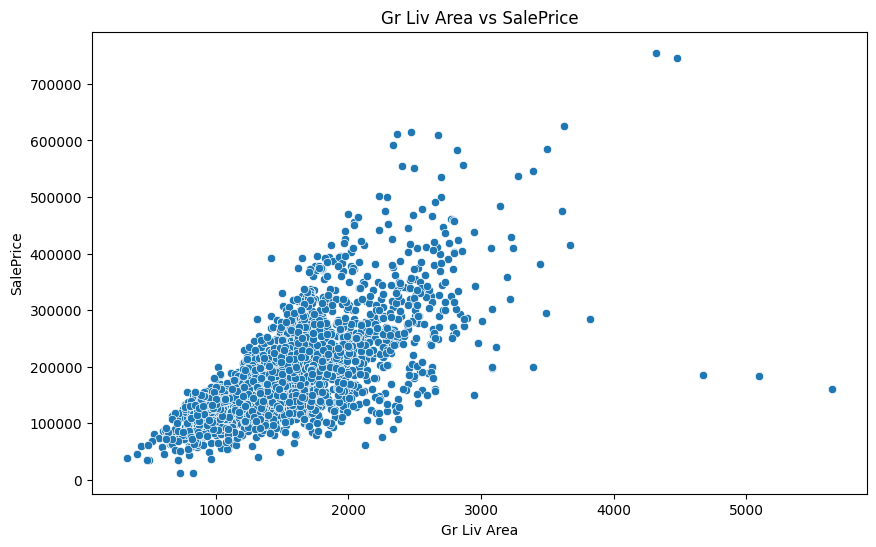

In [17]:
# Phân tích mối quan hệ giữa 2 cột Gr Liv Area, SalePrice

bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')
